In [2]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

np.set_printoptions(threshold=np.nan)

%matplotlib inline

def remove_categorical_columns(df):
    df.drop('MSZoning',axis=1,inplace=True)
    df.drop('Street',axis=1,inplace=True)
    df.drop('Alley',axis=1,inplace=True)
    df.drop('LotShape',axis=1,inplace=True)
    df.drop('LandContour',axis=1,inplace=True)
    df.drop('Utilities',axis=1,inplace=True)
    df.drop('LotConfig',axis=1,inplace=True)
    df.drop('LandSlope',axis=1,inplace=True)
    df.drop('Neighborhood',axis=1,inplace=True)
    df.drop('Condition1',axis=1,inplace=True)
    df.drop('Condition2',axis=1,inplace=True)
    df.drop('BldgType',axis=1,inplace=True)
    df.drop('HouseStyle',axis=1,inplace=True)
    df.drop('RoofStyle',axis=1,inplace=True)
    df.drop('RoofMatl',axis=1,inplace=True)
    df.drop('Exterior1st',axis=1,inplace=True)
    df.drop('Exterior2nd',axis=1,inplace=True)
    df.drop('MasVnrType',axis=1,inplace=True)
    df.drop('ExterQual',axis=1,inplace=True)
    df.drop('ExterCond',axis=1,inplace=True)
    df.drop('Foundation',axis=1,inplace=True)
    df.drop('BsmtQual',axis=1,inplace=True)
    df.drop('BsmtCond',axis=1,inplace=True)
    df.drop('BsmtExposure',axis=1,inplace=True)
    df.drop('BsmtFinType1',axis=1,inplace=True)
    df.drop('BsmtFinType2',axis=1,inplace=True)
    df.drop('Heating',axis=1,inplace=True)
    df.drop('HeatingQC',axis=1,inplace=True)
    df.drop('CentralAir',axis=1,inplace=True)
    df.drop('Electrical',axis=1,inplace=True)
    df.drop('KitchenQual',axis=1,inplace=True)
    df.drop('Functional',axis=1,inplace=True)
    df.drop('FireplaceQu',axis=1,inplace=True)
    df.drop('GarageType',axis=1,inplace=True)
    df.drop('GarageFinish',axis=1,inplace=True)
    df.drop('GarageQual',axis=1,inplace=True)
    df.drop('GarageCond',axis=1,inplace=True)
    df.drop('PavedDrive',axis=1,inplace=True)
    df.drop('PoolQC',axis=1,inplace=True)
    df.drop('Fence',axis=1,inplace=True)
    df.drop('MiscFeature',axis=1,inplace=True)
    df.drop('SaleType',axis=1,inplace=True)
    df.drop('SaleCondition',axis=1,inplace=True)

def input_missing_value(df):
    
    # MSSubClass as str
    df['MSSubClass'] = df['MSSubClass'].astype("str")
    #After converting this column to String, it will be handled as categorical
    #There is one value in the test set that there isn't in the training. It is 150
    #It will be result in one column for this categorical value that doesn't exist in the training set
    #It can't happen
    #There is only one value 150 in the row 1358 in the test set
    #We also can't remove any single row from the test set as we will need make predictions for all rows 
    #Let's just pass the value 150 to 40 , as this value exists in booth sets and is is the less common 
    df['MSSubClass'][df.MSSubClass=='150']='40'
    
    # Converting OverallCond to str
    df.OverallCond = df.OverallCond.astype("str")
    
    # KitchenAbvGr to categorical
    df['KitchenAbvGr'] = df['KitchenAbvGr'].astype("str")
    df.drop(df[df.KitchenAbvGr=='3'].index,inplace=True) # apenas no treino
    
    # Year and Month to categorical
    df['YrSold'] = df['YrSold'].astype("str")
    df['MoSold'] = df['MoSold'].astype("str")    
    
    #LotFrontage - insert the mean 
    imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
    #print(np.shape(df['LotFrontage']))
    df['LotFrontage'] = imp.fit_transform(df['LotFrontage']).transpose()    
   
    #Alley
    df.Alley.fillna(inplace=True,value='No')

    #MasVnrType - remove the records where the value is NA 
    #print("Number of lines where MasVnrType has Nan value", len(df[df['MasVnrType'].isnull()]))
    #df.dropna(axis=0,subset=['MasVnrType'],inplace=True)
    #df.drop('MasVnrType',axis=1,inplace=True)
    # MasVnrType NA in all. filling with most popular values
    df.MasVnrType.fillna(value=df['MasVnrType'].mode()[0],inplace=True)
    
    #MasVnrArea - remove the hole column
    df.drop('MasVnrArea',axis=1,inplace=True)
    
    #Condition2 - remove the hole column Possui quantidade de tipos diferentes na base de treino e teste e apenas 
    #um dos tipos é relevante    
    df.drop('Condition2',axis=1,inplace=True)
    
    #RoofMatl - remove the hole column Possui quantidade de tipos diferentes na base de treino e teste e apenas 
    #um dos tipos é relevante    
    df.drop('RoofMatl',axis=1,inplace=True)
    

    #MSZoning   - tem NA apenas na base de teste. Como nao posso remover linhas removo a coluna   
    #df.dropna(axis=0,subset=['MSZoning'],inplace=True)
    df.drop('MSZoning',axis=1,inplace=True)
    #df.MSZoning.fillna(df['MSZoning'].mode()[0])

    
    #BsmtQual
    df.BsmtQual.fillna(inplace=True,value='No')
    
    #HouseStyle - Esse valor so existe na base de treino. Ao inves de remover toda coluna removo somente as linhas 
    df.drop(df[df.HouseStyle=='2.5Fin'].index,inplace=True)
    
    #BsmtCond
    df.BsmtCond.fillna(inplace=True,value='No')

    #BsmtExposure
    df.BsmtExposure.fillna(inplace=True,value='No')

    #BsmtFinType1
    df.BsmtFinType1.fillna(inplace=True,value='No')

    #BsmtFinType2
    df.BsmtFinType2.fillna(inplace=True,value='No')

    #Electrical - remove the records where the value is NA
    #print("Number of lines where Electrical has Nan value",len(df[df['Electrical'].isnull()]))
    df.dropna(axis=0,subset=['Electrical'],inplace=True) # apenas no treino 
    df.drop(df[df.Electrical=='Mix'].index,inplace=True) # apenas no treino
    #print("Number of lines where Electrical has Nan value",len(df[df['Electrical'].isnull()]))

    #FireplaceQu
    df.FireplaceQu.fillna(inplace=True,value='No')
    

    #GarageType
    df.GarageType.fillna(inplace=True,value='No')

    #GarageYrBlt - remove the hole column
    df.drop('GarageYrBlt',axis=1,inplace=True)

    #GarageFinish
    df.GarageFinish.fillna(inplace=True,value='No')

    #GarageQual - A base de teste nao tem um dos tipos presente na base de treino. Assim a base de treino terá uma 
    #feature para esse tipo e a de teste não. Alem disso, apenas um tipo é pertinente
    #Achei melhor entao excluir essa coluna    
    df.drop('GarageQual',axis=1,inplace=True)
    #df.drop(df[df.GarageQual=='Ex'].index,inplace=True)
    
    #GarageCond
    df.GarageCond.fillna(inplace=True,value='No')

    #PoolQC
    #df.PoolQC.fillna(inplace=True,value='No')
    df.drop('PoolQC',axis=1,inplace=True)
    
    #Fence
    df.Fence.fillna(inplace=True,value='No')

    #MiscFeature
    #df.MiscFeature.fillna(inplace=True,value='No')
    df.drop('MiscFeature',axis=1,inplace=True)

    #MiscVal
    df.drop('MiscVal',axis=1,inplace=True)
    
    #SaleType
    df.drop('SaleType',axis=1,inplace=True)
    
    #Exterior1st- nao posso remover linhas do teste
    #df.dropna(axis=0,subset=['Exterior1st'],inplace=True)     
    #df.drop(df[df.Exterior1st=='Stone'].index,inplace=True)
    #df.drop(df[df.Exterior1st=='ImStucc'].index,inplace=True)
    #df.drop(df[df.Exterior1st=='CBlock'].index,inplace=True)
    df.drop('Exterior1st',axis=1,inplace=True)
    
    #Exterior2nd
    #df.dropna(axis=0,subset=['Exterior2nd'],inplace=True)
    #df.Exterior2nd.fillna(inplace=True,value= 'Other')
    #df.drop(df[df.Exterior2nd=='Other'].index,inplace=True)
    #df.drop(df[df.Exterior2nd=='CBlock'].index,inplace=True)
    df.drop('Exterior2nd',axis=1,inplace=True)
    
    #Heating -- esses tipos existem apenas na base de treino
    df.drop(df[df.Heating=='OthW'].index,inplace=True)
    df.drop(df[df.Heating=='Floor'].index,inplace=True)
    
    #KitchenQual
    #df.dropna(axis=0,subset=['KitchenQual'],inplace=True)
    df.KitchenQual.fillna(inplace=True,value='Fa') #- Apenas a base de teste tem NA e como nao posso remover registro
    #dessa base setei o valor menos comum
    
    #Functional
    #df.dropna(axis=0,subset=['Functional'],inplace=True)
    df.drop('Functional',axis=1,inplace=True)
    
    #Utilities
    df.drop('Utilities',axis=1,inplace=True)
    
    #BsmtFinSF1
    #df.dropna(axis=0,subset=['BsmtFinSF1'],inplace=True)
    df['BsmtFinSF1'] = imp.fit_transform(df['BsmtFinSF1']).transpose()    
    
    #BsmtFinSF2
    #df.dropna(axis=0,subset=['BsmtFinSF2'],inplace=True)
    df['BsmtFinSF2'] = imp.fit_transform(df['BsmtFinSF2']).transpose()    
    
    #BsmtUnfSF
    #df.dropna(axis=0,subset=['BsmtUnfSF'],inplace=True)
    df.drop('BsmtUnfSF',axis=1,inplace=True)
    
    #TotalBsmtSF
    #df.dropna(axis=0,subset=['TotalBsmtSF'],inplace=True)
    #df['TotalBsmtSF'] = imp.fit_transform(df['TotalBsmtSF']).transpose()    
    df.TotalBsmtSF.fillna(value=0,inplace=True)
    
    #BsmtFullBath - apenas na base de teste tem NA.Nao posso remover a linha
    df.BsmtFullBath.fillna(inplace=True,value=0)
    
    #BsmtHalfBath- apenas na base de teste tem NA.Nao posso remover a linha
    df.BsmtHalfBath.fillna(inplace=True,value=0)
    
    #GarageCars
    #df.dropna(axis=0,subset=['GarageCars'],inplace=True)
    df.GarageCars.fillna(value=0,inplace=True)
    
    #GarageArea
    #df.dropna(axis=0,subset=['GarageArea'],inplace=True)
    df.GarageArea.fillna(value=0,inplace=True)
    
df = pd.read_csv("train.csv",na_values=['?','NA'],delimiter=',',delim_whitespace=False)
df_test = pd.read_csv("test.csv",na_values=['?','NA'],delimiter=',',delim_whitespace=False)

print(df.shape)
print(df_test.shape)
#print(df.head())
#print(df.describe())
#print(df.dtypes)
#df = df.dropna()




from sklearn.preprocessing import Imputer

########################Dealing with missing values

#missing data
# total = df.isnull().sum().sort_values(ascending=False)
# percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# print(missing_data.head(20))

# 
#               Total   Percent
# PoolQC         1453  0.995205
# MiscFeature    1406  0.963014
# Alley          1369  0.937671
# Fence          1179  0.807534
# FireplaceQu     690  0.472603
# LotFrontage     259  0.177397
# GarageCond       81  0.055479
# GarageType       81  0.055479
# GarageYrBlt      81  0.055479
# GarageFinish     81  0.055479
# GarageQual       81  0.055479
# BsmtExposure     38  0.026027
# BsmtFinType2     38  0.026027
# BsmtFinType1     37  0.025342
# BsmtCond         37  0.025342
# BsmtQual         37  0.025342
# MasVnrArea        8  0.005479
# MasVnrType        8  0.005479
# Electrical        1  0.000685
# Utilities         0  0.000000



#print(df.columns[df.isnull().any()])
#'LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
#       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
#       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
#       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
#       'MiscFeature'
input_missing_value(df)


#print(df_test.columns[df_test.isnull().any()])
#Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
#       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
#       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
#      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
#       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
#      'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
#       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
#       'SaleType'],

input_missing_value(df_test)


#Valores numericos que continham NA sao detectados como String. Assim, depois que removemos o NA temos que setar corretamente 
#o tipo 
df_test.BsmtFullBath = df_test.BsmtFullBath.astype("int64")
df_test.BsmtHalfBath = df_test.BsmtHalfBath.astype("int64")
df_test.GarageCars = df_test.GarageCars.astype("int64")
df_test.GarageArea = df_test.GarageArea.astype("int64")

print(df.shape)
print(df_test.shape)
print(df.dtypes)
print("Null values treino \n", df.columns[df.isnull().any()])
print("Null values test \n", df_test.columns[df_test.isnull().any()])

########################End dealing with missing values


# The OneHotEncoder converts features represented as numeric codes (so they are values that can't be ordered)
#to their binary representation
#enc = preprocessing.OneHotEncoder() 
#df = enc.fit_transform(df)


########################Tratando campos nominais

vec = DictVectorizer()
aux = np.asmatrix(vec.fit_transform(df.transpose().to_dict().values()).toarray())

data_train = pd.DataFrame(aux,columns=vec.feature_names_)
#data_train = pd.get_dummies(df)


data_train.to_csv('train_no_categorical.csv')

print("New shape train:" , np.shape(data_train))
print("Indice da coluna SalePrice no novo dataset" , data_train.columns.get_loc('SalePrice'))

################################################# Base de teste

vec = DictVectorizer()
aux_test = vec.fit_transform(df_test.transpose().to_dict().values()).toarray()
data_test = pd.DataFrame(aux_test,columns=vec.feature_names_)
#data_test = pd.get_dummies(df_test)
 
print("New shape test:" , np.shape(data_test))

data_test.to_csv('test_no_categorical.csv')


print("Colunas que existem apenas teste : " , data_test.columns.difference(data_train.columns))
print("Colunas que existem apenas treino : " , data_train.columns.difference(data_test.columns))


(1460, 81)
(1459, 80)
(1445, 66)
(1459, 65)
Id                 int64
MSSubClass        object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond       object
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
MasVnrType        object
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1       float64
BsmtFinType2      object
BsmtFinSF2       float64
                  ...   
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
Bedroo

count      1445.000000
mean     181043.215225
std       79195.218195
min       34900.000000
25%      130000.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


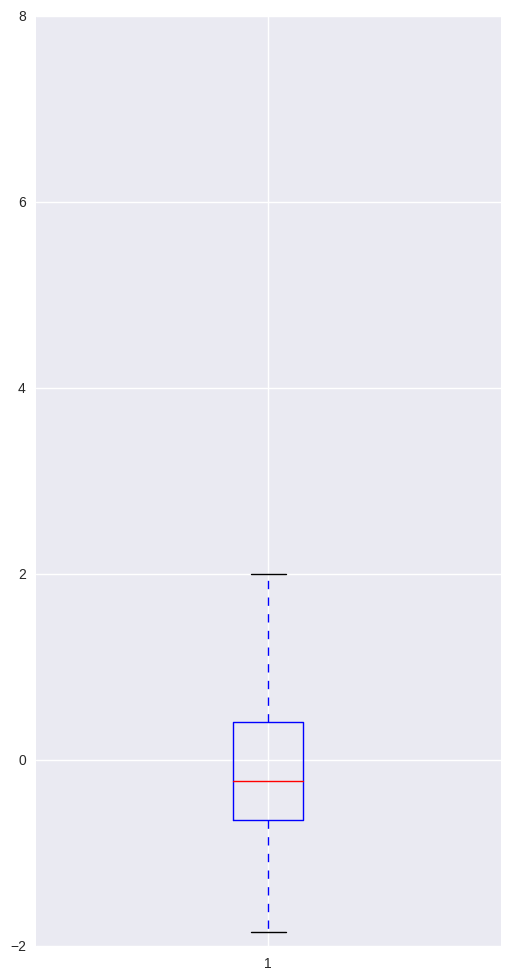

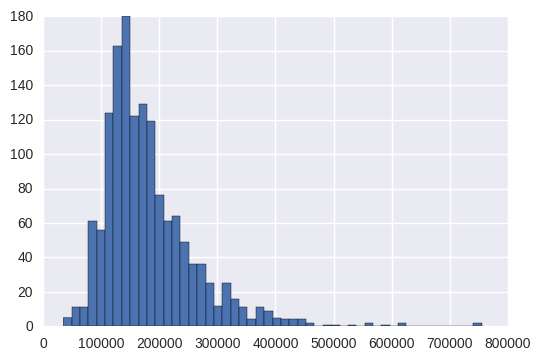

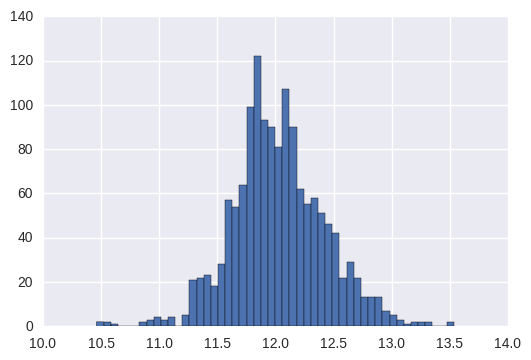

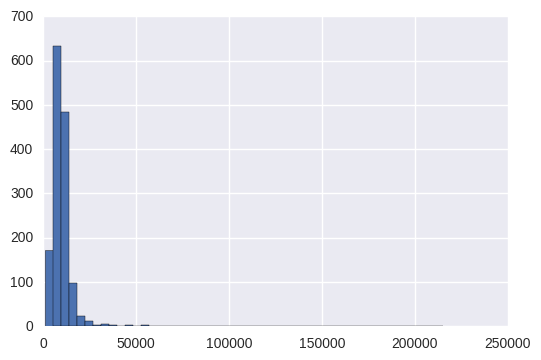

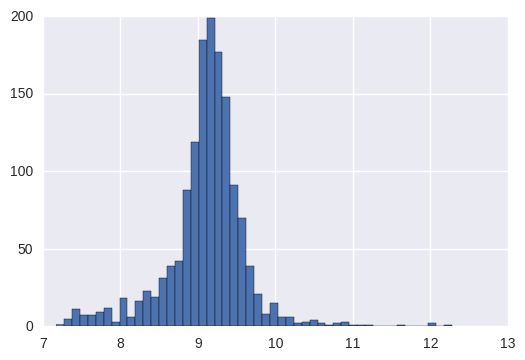

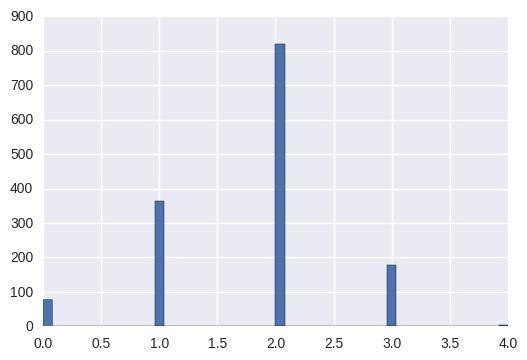

In [3]:
from scipy.stats import norm
from scipy import stats


print(data_train.SalePrice.describe())

saleprice_scaled = preprocessing.StandardScaler().fit_transform((data_train['SalePrice'][:,np.newaxis]));
fig = plt.figure(1, figsize=(6, 12))
#ax = fig.add_subplot(111)
#ax.boxplot(saleprice_scaled)
plt.boxplot(saleprice_scaled)

plt.figure()
x = plt.hist(data_train['SalePrice'],bins=50)

plt.figure()
saleprice_log = np.log(data_train['SalePrice'])
x = plt.hist(saleprice_log,bins=50)



plt.figure()
x = plt.hist(data_train['LotArea'],bins=50)

plt.figure()
saleprice_log = np.log(data_train['LotArea'])
x = plt.hist(saleprice_log,bins=50)





plt.figure()
x = plt.hist(data_train['GarageCars'],bins=50)

# plt.figure()
# saleprice_log = np.log(data_train['GarageArea'])
# x = plt.hist(saleprice_log,bins=50)


#data_train['SalePrice'] = np.log(data_train['SalePrice'])
data_train['OverallQual'] = np.log(data_train['OverallQual'])
data_train['LotArea'] = np.log(data_train['LotArea'])


data_test['OverallQual'] = np.log(data_test['OverallQual'])
data_test['LotArea'] = np.log(data_test['LotArea'])



In [4]:
# Encode text values to dummy variables(i.e. [1,0,0],[0,1,0],[0,0,1] for red,green,blue)
def encode_text_dummy(df,name):
    dummies = pd.get_dummies(df[name])
    for x in dummies.columns:
        dummy_name = "{}-{}".format(name,x)
        df[dummy_name] = dummies[x]
    df.drop(name, axis=1, inplace=True)
    





In [5]:
print("\n Tentativa de selecionar melhores features \n")

from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel


#Removing features with low variance
#print("Original shape: {}".format(np.shape(df.iloc[:,0:-1])))
#sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
#features = sel.fit_transform(df.iloc[:,0:-1])
#print("Shape apos Removing features with low variance {}".format(np.shape(features))) #nenhuma foi selecionada 
#print("\n")

#Tree-based feature selection
y_train = (data_train['SalePrice'])
x_train = (data_train.drop('SalePrice',axis=1))

print()

clf = ExtraTreesRegressor(n_estimators=20)
clf = clf.fit(x_train,y_train)
data = np.zeros((1,x_train.shape[1])) 
data = pd.DataFrame(data, columns=x_train.columns)
data.iloc[0] = clf.feature_importances_
data = data.T.sort_values(df.index[0], ascending=False).T


print("As features selecionadas com Tree-based feature selection foram: \n")
yyy = np.asarray((data.columns[0:27]))
xxx = np.asarray((data.iloc[:,0:27]))
print(yyy)
print(xxx)

model = SelectFromModel(clf, prefit=True)
aux = model.transform(x_train)

print("\n New shape train apos Tree-based feature selection: {}".format(aux.shape))

print("\n Fim tentativa selecionar melhores features \n")


data_train_less_features = pd.concat([pd.DataFrame(aux),pd.DataFrame(y_train)],axis=1)
data_train_less_features.to_csv('data_train_less_features.csv')


aux = model.transform((data_test))
data_test_less_features = pd.DataFrame(aux)
print("\n New shape test apos Tree-based feature selection: {}".format(aux.shape))
data_test_less_features.to_csv('data_test_less_features.csv')


from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn   import metrics
from sklearn.model_selection import train_test_split


 Tentativa de selecionar melhores features 


As features selecionadas com Tree-based feature selection foram: 

['ExterQual=TA' 'GarageCars' 'BsmtQual=Ex' 'GrLivArea' 'OverallQual'
 'Neighborhood=NoRidge' 'FireplaceQu=No' '1stFlrSF' 'FullBath' 'GarageArea'
 '2ndFlrSF' 'TotalBsmtSF' 'BsmtFinSF1' 'LotArea' 'TotRmsAbvGrd'
 'KitchenQual=Ex' 'YearRemodAdd' 'MSSubClass=60' 'BsmtQual=Gd'
 'ExterQual=Fa' 'YearBuilt' 'BldgType=1Fam' 'Fireplaces' 'BsmtExposure=Gd'
 'KitchenQual=TA' 'BsmtFullBath' 'GarageType=Attchd']
[[ 0.28894378  0.14359334  0.09618412  0.07270809  0.05740789  0.02668183
   0.02414233  0.01702627  0.01297943  0.01251562  0.01202374  0.01008085
   0.00956533  0.00912866  0.00809906  0.00667683  0.00666561  0.00639069
   0.00619425  0.00610702  0.00578628  0.00576663  0.00561651  0.0053083
   0.00421392  0.00380913  0.00353074]]

 New shape train apos Tree-based feature selection: (1445, 25)

 Fim tentativa selecionar melhores features 


 New shape test apos Tree-based featur

In [6]:
#Starting making predictors

from sklearn.linear_model import LinearRegression, SGDRegressor

#Caso 1 - Linear Regression 
print("Caso 1 - Linear Regression ")

# Shuffle
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)


#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = LinearRegression()
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))



print("\n\n")
print("SGDRegressor \n\n")

classifier = SGDRegressor()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

###########Less features

print("\n\n Less Features")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))


classifierLinearRegression = LinearRegression()
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
    pred = []    
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierLinearRegression = classifierLinearRegression.fit(x_train_fold, y_train_fold)
    pred = classifierLinearRegression.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierLinearRegression.score(X=x_test_fold,y=y_test_fold))

  
# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# Write the cross-validated prediction
pred = []
pred = np.array(pred,dtype='int64')
pred = classifierLinearRegression.predict(scaler.transform(data_test_less_features))
result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
result.to_csv('pred_LinearRegression.csv', columns=['SalePrice'])




print("\n\n")
print("SGDRegressor \n\n")

classifier = SGDRegressor()

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0
pred = []
for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


Caso 1 - Linear Regression 
Fold #1
Fold score (RMSE): 622243187960918912.00
Accuracy: -62765513129602993115627520.000
Fold #2
Fold score (RMSE): 905009122196841856.00
Accuracy: -131289954335369637232902144.000
Fold #3
Fold score (RMSE): 117636420432799248.00
Accuracy: -1935378154193937026252800.000
Fold #4
Fold score (RMSE): 201586936866963200.00
Accuracy: -7499709332072572561391616.000
Fold #5
Fold score (RMSE): 24891.00
Accuracy: 0.901

 Average RMSE: 5.021361800848278e+17



SGDRegressor 


Fold #1
Fold score (RMSE): 46234.39
Accuracy: 0.653
Fold #2
Fold score (RMSE): 3193689.37
Accuracy: -1633.974
Fold #3
Fold score (RMSE): 1041515.60
Accuracy: -150.710
Fold #4
Fold score (RMSE): 958658.73
Accuracy: -168.609
Fold #5
Fold score (RMSE): 307935.01
Accuracy: -14.108

 Average RMSE: 1568463.8772219159


 Less Features
Fold #1
Fold score (RMSE): 24999.41
Accuracy: 0.881
Fold #2
Fold score (RMSE): 35074.70
Accuracy: 0.812
Fold #3
Fold score (RMSE): 34237.35
Accuracy: 0.845
Fold #4
Fold s

In [7]:
#Caso 3 - SVM
from sklearn.svm import SVR
from sklearn.svm import NuSVR

print("SVM")

# Shuffle
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)

#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))
x_train = np.ascontiguousarray(x_train)


classifier = NuSVR(kernel='linear', C=1e3) #34761.27693615821
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n Less features \n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))
x_train = np.ascontiguousarray(x_train)


#classifier = SVR(kernel='rbf', C=1e3, gamma=0.1) #66483.84692815947
classifierSVR = SVR(kernel='linear', C=1e3) #34761.27693615821
#classifier = SVR(kernel='poly', C=1e3, degree=3) #86747.4465877091
#classifier = NuSVR(C=1e3) #57249.1589623674

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierSVR = classifierSVR.fit(x_train_fold, y_train_fold)
    pred = classifierSVR.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierSVR.score(X=x_test_fold,y=y_test_fold))

    

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# Write the cross-validated prediction
pred = []
pred = np.array(pred,dtype='int64')
pred = classifierSVR.predict(scaler.transform(data_test_less_features))

result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))


result.to_csv('pred_SVR.csv', columns=['SalePrice'])



SVM
Fold #1
Fold score (RMSE): 39525.09
Accuracy: 0.707
Fold #2
Fold score (RMSE): 23699.40
Accuracy: 0.878
Fold #3
Fold score (RMSE): 39725.28
Accuracy: 0.820
Fold #4
Fold score (RMSE): 23568.49
Accuracy: 0.910
Fold #5
Fold score (RMSE): 25820.08
Accuracy: 0.894

 Average RMSE: 31381.979449950468


 Less features 

Fold #1
Fold score (RMSE): 24419.49
Accuracy: 0.887
Fold #2
Fold score (RMSE): 33924.50
Accuracy: 0.824
Fold #3
Fold score (RMSE): 34806.81
Accuracy: 0.840
Fold #4
Fold score (RMSE): 25491.69
Accuracy: 0.874
Fold #5
Fold score (RMSE): 43828.66
Accuracy: 0.714

 Average RMSE: 33255.000569825526


In [8]:
from sklearn.neural_network import MLPRegressor

# Shuffle
print("NN MLPRegressor")
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)


#Normalization
y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10,4,2), random_state=1)
kf = KFold(5)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    

# The mean squared error
#pred = classifier.predict(x_test_scaled)
#score = metrics.mean_squared_error(y_test, pred)
#print("Final, out of sample score (RMSE): {}".format(score))    

# Evaluate success using accuracy
#print("Final Accuracy: %.3f" % classifier.score(X=x_test_scaled,y=y_test))

###########Less features
print("\n\n")
#Normalization
y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train_scaled = scaler.transform((x_train))


classifier = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(8,2), random_state=1)
kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train_scaled):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train_scaled[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train_scaled[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): %.2f" %(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    


NN MLPRegressor
Fold #1
Fold score (RMSE): 36219.85
Accuracy: 0.740
Fold #2
Fold score (RMSE): 49890.26
Accuracy: 0.594
Fold #3
Fold score (RMSE): 37256.48
Accuracy: 0.792
Fold #4
Fold score (RMSE): 57485.03
Accuracy: 0.533
Fold #5
Fold score (RMSE): 38793.61
Accuracy: 0.762

 Average RMSE: 44717.857481245104



Fold #1
Fold score (RMSE): 23596.58
Accuracy: 0.894
Fold #2
Fold score (RMSE): 42417.91
Accuracy: 0.725
Fold #3
Fold score (RMSE): 33739.61
Accuracy: 0.850
Fold #4
Fold score (RMSE): 20589.06
Accuracy: 0.918
Fold #5
Fold score (RMSE): 48618.37
Accuracy: 0.648

 Average RMSE: 35445.9985345669


In [9]:
##Random Forests
from sklearn.ensemble import RandomForestRegressor

# Shuffle
print("Random Forests")
np.random.seed(42)
data_train = data_train.reindex(np.random.permutation(data_train.index))
data_train.reset_index(inplace=True, drop=True)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(data_train.drop('SalePrice',axis=1), data_train['SalePrice'], 
                                                    test_size=0.20, random_state=42)

classifier = RandomForestRegressor(n_estimators=20,oob_score=True)

classifier.fit(x_train, y_train)

# The mean squared error
pred = classifier.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifier.score(X=x_test,y=y_test))
print("\n\n")


y_train = ((data_train['SalePrice']))
x_train = (data_train.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))

classifier = RandomForestRegressor(n_estimators=1000,oob_score=True)

kf = KFold(5, random_state=7)    
oos_y = []
oos_pred = []
fold = 0

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifier.fit(x_train_fold, y_train_fold)
    pred = classifier.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifier.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
print("\n oob score : {}".format(classifier.oob_score_))    

# Write the cross-validated prediction
pred = []
pred = np.array(pred,dtype='int64')
pred = classifier.predict(scaler.transform(data_test))
result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
result.to_csv('pred_RF_full_features.csv', columns=['SalePrice'])

###########Less features
print("\n\n Less features \n\n")

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(data_train_less_features.drop('SalePrice',axis=1), 
                                    data_train_less_features['SalePrice'], test_size=0.20, random_state=42)

classifier = RandomForestRegressor(n_estimators=20,oob_score=True)

classifier.fit(x_train, y_train)

# The mean squared error
pred = classifier.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifier.score(X=x_test,y=y_test))
print("\n\n")


y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))

kf = KFold(n_splits=5, random_state=7)    

oos_y = []
oos_pred = []
fold = 0
pred = []

classifierRandomForestRegressor = RandomForestRegressor(n_estimators=1000,oob_score=True,max_depth=3)

for training, test in kf.split(x_train):
    fold+=1
    print("Fold #{}".format(fold))
        
    x_train_fold = x_train[training]
    y_train_fold = y_train[training]
    x_test_fold = x_train[test]
    y_test_fold = y_train[test]
    
    classifierRandomForestRegressor = classifierRandomForestRegressor.fit(x_train_fold, y_train_fold)
    pred = classifierRandomForestRegressor.predict(x_test_fold)
    oos_y.append(y_test_fold)
    oos_pred.append(pred)        

    # Measure accuracy    
    score = np.sqrt(metrics.mean_squared_error(y_test_fold,pred))
    print("Fold score (RMSE): {}".format(score))

    # Evaluate success using accuracy
    print("Accuracy: %.3f" % classifierRandomForestRegressor.score(X=x_test_fold,y=y_test_fold))

# Build the oos prediction list and calculate the error.
oos_y = np.concatenate(oos_y)
oos_pred = np.concatenate(oos_pred)
score = np.sqrt(metrics.mean_squared_error(oos_y,oos_pred))
print("\n Average RMSE: {}".format(score))    
print("\n oob score : {}".format(classifierRandomForestRegressor.oob_score_))    


# Write the cross-validated prediction
pred = []
pred = np.array(pred,dtype='int64')
pred = classifierRandomForestRegressor.predict(scaler.transform(data_test_less_features))
result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
result.to_csv('pred_RF_less_features.csv', columns=['SalePrice'])




Random Forests
Mean squared error: 29597.05109582514
Accuracy: 0.852



Fold #1
Fold score (RMSE): 28951.730162219337
Accuracy: 0.886
Fold #2
Fold score (RMSE): 25924.39997455174
Accuracy: 0.897
Fold #3
Fold score (RMSE): 32718.1452740622
Accuracy: 0.820
Fold #4
Fold score (RMSE): 30757.611548626795
Accuracy: 0.822
Fold #5
Fold score (RMSE): 27059.08361496614
Accuracy: 0.880

 Average RMSE: 29185.540590707198

 oob score : 0.8655222916876083


 Less features 


Mean squared error: 29573.029734778032
Accuracy: 0.858



Fold #1
Fold score (RMSE): 36255.553028770286
Accuracy: 0.750
Fold #2
Fold score (RMSE): 39370.18227878145
Accuracy: 0.763
Fold #3
Fold score (RMSE): 41199.07534602904
Accuracy: 0.776
Fold #4
Fold score (RMSE): 36173.829664489225
Accuracy: 0.746
Fold #5
Fold score (RMSE): 39647.80000629268
Accuracy: 0.766

 Average RMSE: 38580.65366317344

 oob score : 0.7589105247989691


In [30]:
from sklearn.ensemble import GradientBoostingRegressor


# Shuffle
np.random.seed(42)
data_train_less_features = data_train_less_features.reindex(np.random.permutation(data_train_less_features.index))
data_train_less_features.reset_index(inplace=True, drop=True)

y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))


# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.20, random_state=42)



classifierGBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, 
                                               min_samples_leaf=15, min_samples_split=10, loss='huber').fit(x_train, y_train)

# The mean squared error
pred = classifierGBR.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifierGBR.score(X=x_test,y=y_test))
print("\n\n")



# Shuffle
np.random.seed(42)
data_train_less_features = data_train_less_features.reindex(np.random.permutation(data_train_less_features.index))
data_train_less_features.reset_index(inplace=True, drop=True)

y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))


# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.20, random_state=43)

classifierGBR.fit(x_train, y_train)

# The mean squared error
pred = classifierGBR.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("Mean squared error: {}".format(score))
# Evaluate success using accuracy
print("Accuracy: %.3f" % classifierGBR.score(X=x_test,y=y_test))
print("\n\n")

# Write the cross-validated prediction
pred = []
pred = np.array(pred,dtype='int64')
pred = classifierGBR.predict(scaler.transform(data_test_less_features))
result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
result.to_csv('pred_GBR.csv', columns=['SalePrice'])



Mean squared error: 21942.1695041698
Accuracy: 0.918



Mean squared error: 36631.62933190776
Accuracy: 0.811





In [32]:
# Voting Ensemble for Classification
from sklearn.ensemble import VotingClassifier

y_train = ((data_train_less_features['SalePrice']))
x_train = (data_train_less_features.drop('SalePrice',axis=1))
scaler = preprocessing.StandardScaler().fit((x_train))
x_train = scaler.transform((x_train))


# estimators = []
# estimators.append(('linear',classifierLinearRegression))
# estimators.append(('svr',classifierSVR))
# estimators.append(('rf',classifierRandomForestRegressor))

# # # create the ensemble model
# ensemble = VotingClassifier(estimators,voting='hard')
# ensemble = ensemble.fit(x_train,y_train)
# pred = []
# pred = np.array(pred,dtype='float64')
# pred = ensemble.predict(scaler.transform(data_test_less_features))
# result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
# result.to_csv('pred_EnsembleVoting.csv', columns=['SalePrice'])


#Emsemble via stacking
from mlxtend.regressor import StackingRegressor

stregr = StackingRegressor(regressors=[classifierLinearRegression,classifierSVR, classifierRandomForestRegressor,classifierGBR], 
                           meta_regressor=classifierGBR)
stregr.fit(x_train,y_train)
pred = []
pred = np.array(pred,dtype='int64')
pred = stregr.predict(scaler.transform(data_test_less_features))
result = pd.DataFrame(pred,columns=['SalePrice'], index=range(1461,2920))
result.to_csv('pred_EnsembleStacker.csv', columns=['SalePrice'])

#Emsemble via avereging

final_labels = (
                #(classifierLinearRegression.predict(scaler.transform(data_test_less_features))) + 
                #(classifierSVR.predict(scaler.transform(data_test_less_features))) +
                (classifierRandomForestRegressor.predict(scaler.transform(data_test_less_features)))+
                (classifierGBR.predict(scaler.transform(data_test_less_features)))
               
               ) / 2

## Saving to CSV
pd.DataFrame({'Id': range(1461,2920), 'SalePrice': final_labels}).to_csv('pred_EnsembleAvereging.csv', index =False)  

print("Finished")

Finished
